In [1]:
%cd yolov5
import matplotlib.pyplot as plt
import cv2
from detect import generate_bbox  # modified file in yolov5 to output a dictionary

In [2]:
def extract_clothes(img_path: str): 
    '''
    Extract Topwear, Bottomwear and Footwear from a given Image
    Note: In case there are multiple items of the same class, the item with highest confidence score is returned.
    
    Args:
        img_path: Path to the image file that you want to extract clothes from.
        
    Returns:
        ouputs: Dict[numpy.ndarray], Dictionary containing detected Object Class as Keys and the image slice as Values. Also contains the original image.
    '''
    image = plt.imread(img_path)   
    results = generate_bbox(img_path, conf_thres=0.3)
    topwear_score, bottomwear_score, footwear_score = 0, 0, 0
    outputs = {"original_image": image}
    for result in results[0]:
        XMIN, YMIN, XMAX, YMAX = result[2]
        if (result[0] == 'Topwear') and (result[1] > topwear_score):
            topwear_score = result[1]
            outputs["topwear"] = image[YMIN:YMAX, XMIN:XMAX]
        elif (result[0] == 'Bottomwear') and (result[1] > bottomwear_score):
            bottomwear_score = result[1]
            outputs["bottomwear"] = image[YMIN:YMAX, XMIN:XMAX]
        elif (result[0] == 'Footwear') and (result[1] > footwear_score):
            footwear_score = result[1]
            outputs["footwear"] = image[YMIN:YMAX, XMIN:XMAX]
    return outputs


def plot_clothes(**images):
    '''
    Plot a dictionary of Images in a row
    
    Args:
        Dict: Image Names and Images in numpy.ndarray format
    
    Returns:
        matplotlib.figure object
    '''
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.axis("off")
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

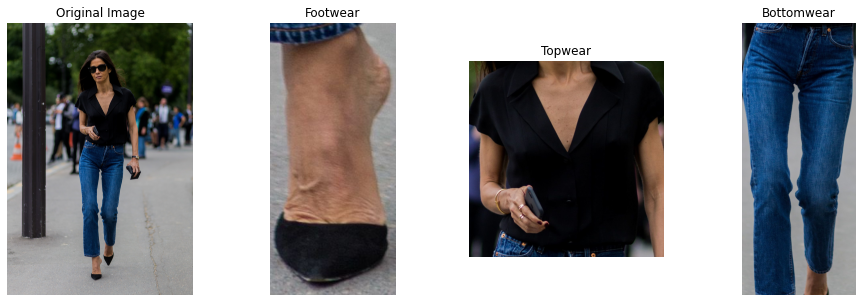

In [3]:
image_path = "./inference_data/test1.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

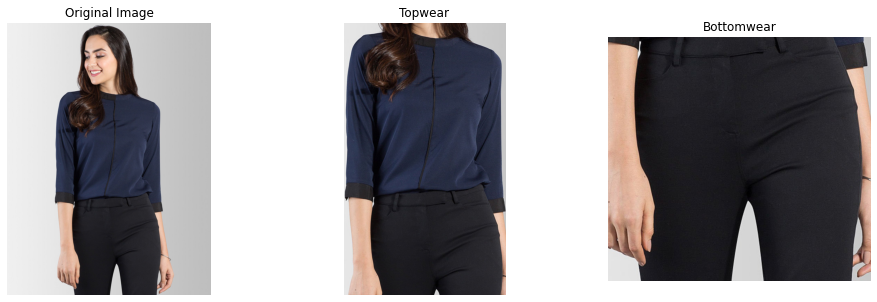

In [4]:
image_path = "./inference_data/test2.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

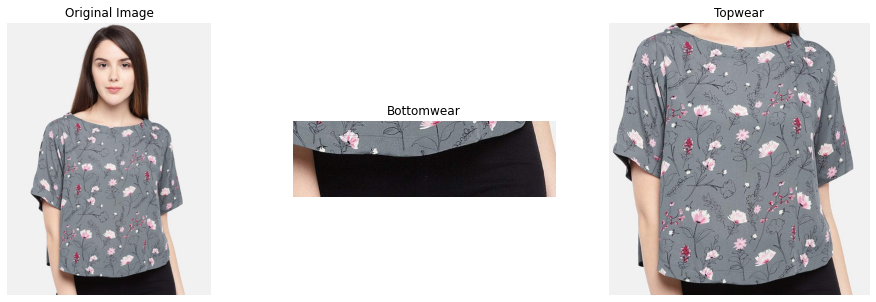

In [8]:
image_path = "./inference_data/test3.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

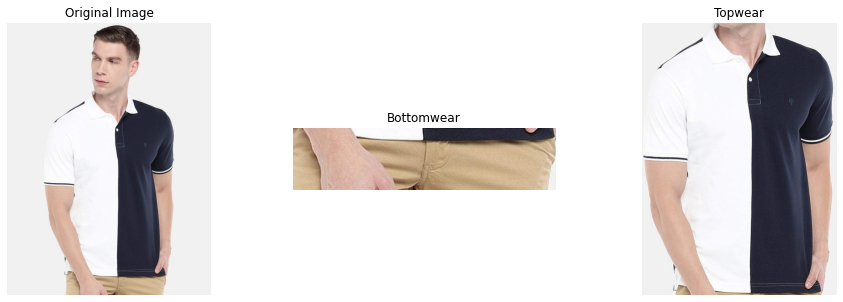

In [11]:
image_path = "./inference_data/test4.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

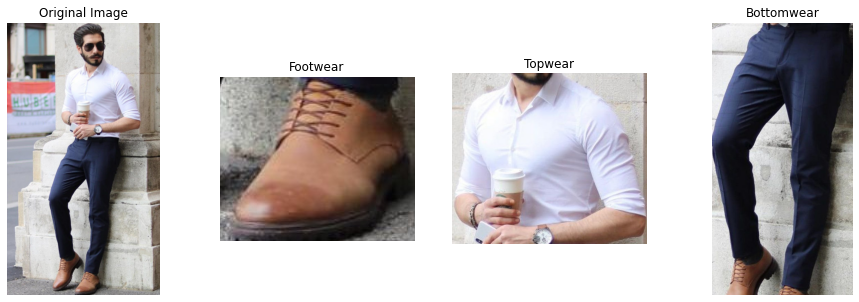

In [13]:
image_path = "./inference_data/test6.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

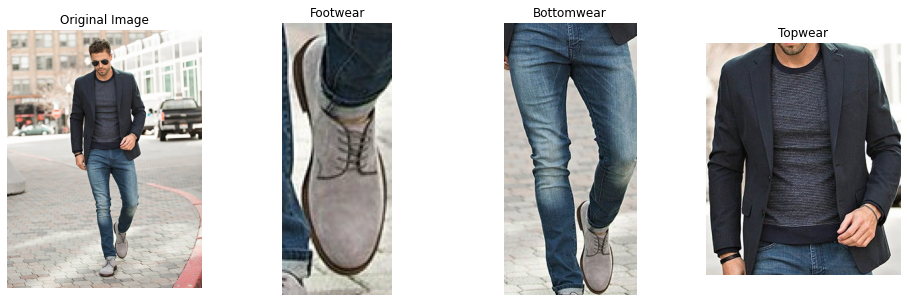

In [14]:
image_path = "./inference_data/test5.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

In [15]:
%%timeit
outputs = extract_clothes(image_path)

799 ms ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
